# Assigment --2

In [1]:
import numpy as np 
import tensorflow as tf
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('ggplot')

### Create dataset

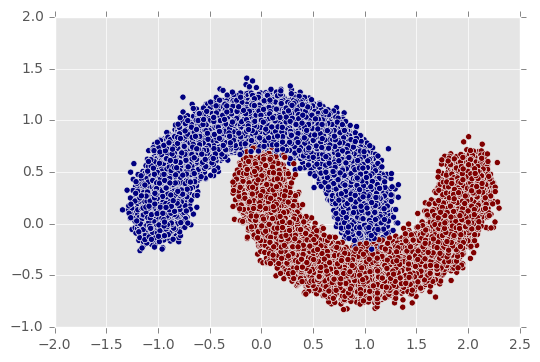

In [2]:
x_total, y_total = datasets.make_moons(n_samples=50000, shuffle=True, noise=0.1, random_state=20)
plt.figure()
plt.scatter(x_total[:,0], x_total[:,1], c=y_total)
plt.show()

In [3]:
# Normalize the data attributes
norm_x = preprocessing.normalize(x_total)

# One _hot for classification
y_total = np.eye(2)[y_total]

### Split data into test and training sets randomly

In [4]:
def shuffle_in_unison(a, b):
    '''
    To shuffle the data
    '''
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
        
    return shuffled_a, shuffled_b

In [5]:
##  Training and Testing set
split_ratio = 0.4
# Shuffle before splitting
x_total, y_total = shuffle_in_unison(x_total, y_total)
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=split_ratio)

### Built Network

![alt text](./images/network_image.png)

In [6]:
def network_architecture(x, hid1_size, hid2_size):
    '''
    Creates a 2-layer perceptron based on hidden sizes
    '''
    # Input layer -> Hidden layer
    W1 = tf.Variable(tf.random_normal([2, hid1_size]), trainable=True, name = 'W1')
    # Hidden layer -> Output layer
    W2 = tf.Variable(tf.random_normal([hid1_size, hid2_size]), trainable=True, name = 'W2')

    # Hidden layer
    hid_out1 = tf.matmul(x, W1)
    hid_out2 = tf.nn.bias_add(hid_out1, tf.constant(1, dtype=tf.float32, shape=[hid1_size]), name='Bias1')
    hid_out = tf.nn.sigmoid(hid_out2)

    # Output Layer
    out1 = tf.matmul(hid_out, W2)
    out2 = tf.nn.bias_add(out1, tf.constant(1, dtype=tf.float32, shape=[hid2_size]), name='Bias2')
    out  = out2 
    
    return out

## Tunning Hyper-parameters and Training

In [24]:
## Hyperparameters
l_rate        = 1e-4
epochs        = 500
batch_size    = 100
hidden1_size  = 20
hidden2_size  = 2

In [25]:
# Input Placeholders 
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 2]) 

# Create network
y_ = network_architecture(x, hidden1_size, hidden2_size)

In [26]:
# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 

# Optimization algorithm
optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)

# Initializer
init_op = tf.global_variables_initializer()

# Accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Training

In [27]:
print('The_Ratio : ', split_ratio)
print('The Number for our Samples: ', len(x_total))
print('Training_Set: ', len(x_train))
print('Testing_Set    : ', len(x_test))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_train), batch_size):
            batch_x = x_train[batch:(batch+batch_size)]
            batch_y = y_train[batch:(batch+batch_size)]
            
            _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\n Training Done!")
    print('The accuracy for our test batch is   ', sess.run(accuracy, feed_dict={x: x_test, y: y_test}))
    
sess.close()

The_Ratio :  0.4
The Number for our Samples:  50000
Training_Set:  30000
Testing_Set    :  20000

 Training Done!
The accuracy for our test batch is    0.9847


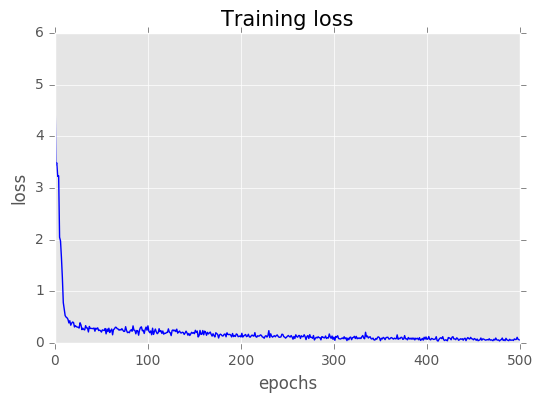

In [29]:
ax = np.floor(np.linspace(0, epochs, epochs))
plt.plot(ax, cost, color='b')
plt.title('Training loss', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('loss')

## Changing Hidden layer size and check Accuracy

In [12]:
# Delete any previous sessions
del sess

In [13]:
layer_size_cost = {}


for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 2])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_train), batch_size):
                batch_x = x_train[batch:(batch+batch_size)]
                batch_y = y_train[batch:(batch+batch_size)]

                _, loss = sess.run([optim, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

            cost.append(loss)

        print("\n Training Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_test, y: y_test})
        print('The accuracy for our test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

    # Delete previous session
    del sess

Current Hidden Layer Size: 3

 Training Done!
The accuracy for our test batch is:  0.88355
Current Hidden Layer Size: 4

 Training Done!
The accuracy for our test batch is:  0.88375
Current Hidden Layer Size: 5

 Training Done!
The accuracy for our test batch is:  0.9764
Current Hidden Layer Size: 6

 Training Done!
The accuracy for our test batch is:  0.9761
Current Hidden Layer Size: 7

 Training Done!
The accuracy for our test batch is:  0.98015
Current Hidden Layer Size: 8

 Training Done!
The accuracy for our test batch is:  0.9785
Current Hidden Layer Size: 9

 Training Done!
The accuracy for our test batch is:  0.96765
Current Hidden Layer Size: 10

 Training Done!
The accuracy for our test batch is:  0.97895
Current Hidden Layer Size: 11

 Training Done!
The accuracy for our test batch is:  0.99285
Current Hidden Layer Size: 12

 Training Done!
The accuracy for our test batch is:  0.99325
Current Hidden Layer Size: 13

 Training Done!
The accuracy for our test batch is:  0.9938

### Plot Accuracy-vs-Hidden Layer Increments

In [17]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

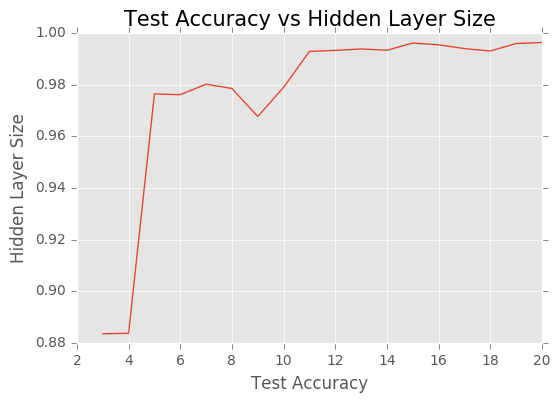

In [23]:
ax = np.floor(np.linspace(3, 20, 18))
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size', fontsize=15)
plt.xlabel('Test Accuracy')
plt.ylabel('Hidden Layer Size')

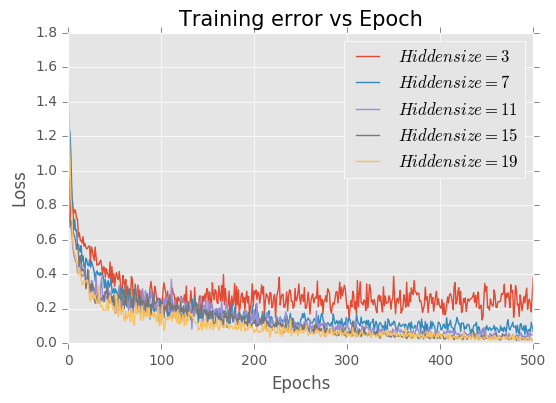

In [31]:
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Epoch', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')